# author: Levon Abramian, J4132
# Task 8 (Extended). Practical analysis of advanced algorithms

### Goal: Practical analysis of advanced algorithms.

#### 1. Dynamic Programming

#### 2.Floyd-Warshall Algorithm (All-Pairs Shortest Paths)


The analysis of dynamic programming (DP) involves the study of its design principles, time and space complexity, and the implementation of algorithms for conducting experiments. The following provides an overview of these elements and describes a structured approach to conducting experiments.

### Dynamic Programming Overview

#### 1. Design Technique
Dynamic programming is a method for solving complex problems by breaking them down into simpler subproblems. It is applicable when the problem can be divided into overlapping subproblems that can be solved independently. The two main strategies of DP are:

- Top-down approach (Memoization): Solving the problem by recursively breaking it down and storing results of subproblems to avoid redundant calculations.

- Bottom-up approach (Tabulation): Iteratively solving all subproblems and storing the results in a table (array).

#### 2. Time Complexity
- The time complexity of a dynamic programming algorithm depends on the number of subproblems and the time it takes to solve each subproblem. 

For example:
- In the Fibonacci sequence problem:
   - Recursive: Exponential time, $O(2^n)$
   - Dynamic Programming (Top-down): $O(n)$ due to memoization.
   - Dynamic Programming (Bottom-up): $O(n)$ since each state is computed exactly once.

#### 3. Space Complexity
- Space complexity can vary depending on whether memoization or tabulation is used.

Examples:
- Fibonacci (Top-down): $O(n)$ due to the recursion stack.
- Fibonacci (Bottom-up): $O(n)$ for storing the computed values.
- Optimized Fibonacci using two variables: $O(1)$ space.

### Analysis of the Floyd-Warshall Algorithm

#### 1. Design Technique
The Floyd-Warshall algorithm follows a dynamic programming design technique. It uses a two-dimensional array to store the shortest path distances between pairs of nodes and systematically updates this array based on intermediate vertices. 

#### 2. Time Complexity
- The Floyd-Warshall algorithm has a time complexity of $O(V^3)$, where $V$ is the number of vertices in the graph. This complexity arises because the algorithm uses three nested loops to iterate through all pairs of vertices and all possible intermediate vertices.

#### 3. Space Complexity
- The space complexity is $O(V^2)$ since the algorithm maintains a distance matrix to store the shortest paths between all pairs of vertices.

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import time

from tqdm.notebook import tqdm

In [2]:
# Top-down approach using memoization
def fibonacci_memo(n, memo={}):
    if n in memo:
        return memo[n]
    if n <= 1:
        return n
    memo[n] = fibonacci_memo(n - 1, memo) + fibonacci_memo(n - 2, memo)
    return memo[n]

# Bottom-up approach using tabulation
def fibonacci_tab(n):
    if n <= 1:
        return n
    fib = [0] * (n + 1)
    fib[1] = 1
    for i in range(2, n + 1):
        fib[i] = fib[i - 1] + fib[i - 2]
    return fib[n]

def fibonacci_recursion(n: int):
    if n <= 1:
        return n
    return fibonacci_recursion(n - 1) + fibonacci_recursion(n - 2)

In [3]:
def run_experiments(max_n):
    memo_times, tab_times, recursion_times = [], [], []
    for n in tqdm(range(max_n + 1)):
        start_time = time.time()
        fibonacci_memo(n)
        top_down_time = time.time() - start_time
        memo_times.append(top_down_time)
        
        start_time = time.time()
        fibonacci_tab(n)
        bottom_up_time = time.time() - start_time
        tab_times.append(bottom_up_time)

        # Measure Recursion
        if n >= 40:
            continue
        start_time = time.time()
        fibonacci_recursion(n)
        recursion_time = time.time() - start_time
        recursion_times.append(recursion_time)
        
    return memo_times, tab_times, recursion_times

memo_times, tab_times, recursion_times = run_experiments(5000)

  0%|          | 0/5001 [00:00<?, ?it/s]

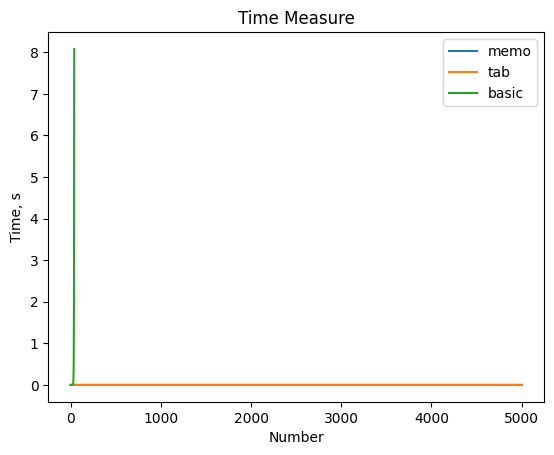

In [4]:
plt.plot(memo_times, label='memo')
plt.plot(tab_times, label='tab')
plt.plot(recursion_times, label='basic')
plt.xlabel('Number')
plt.ylabel('Time, s')
plt.title('Time Measure')
plt.legend();

### Analyzing Results

1. Execution Time: Compare the execution times for the top-down and bottom-up approaches.
2. Scalability: Observe how each approach scales as n increases. Typically, the bottom-up approach is expected to be faster for larger values due to less overhead from recursive calls.
3. Space Efficiency: Consider the space used by each method, especially when n becomes large. The bottom-up approach may use more space but can be optimized to O(1) as indicated earlier.
4. Edge Cases: Test how both functions handle edge cases, such as negative numbers or very large numbers.

In [5]:
def generate_random_graph(num_vertices, edge_probability=0.1):
    graph = [[0 if i != j else 0 for j in range(num_vertices)] for i in range(num_vertices)]
    for i in range(num_vertices):
        for j in range(num_vertices):
            if i != j and random.random() < edge_probability:
                graph[i][j] = random.randint(1, 10)
    return graph

def floyd_warshall_with_paths(graph):
    num_vertices = len(graph)
    
    distance = [[float('inf')] * num_vertices for _ in range(num_vertices)]
    path = [[-1] * num_vertices for _ in range(num_vertices)]
    
    for i in range(num_vertices):
        for j in range(num_vertices):
            if i == j:
                distance[i][j] = 0
            elif graph[i][j] != 0:
                distance[i][j] = graph[i][j]
                path[i][j] = j

    # Floyd-Warshall algorithm with path updates
    for k in range(num_vertices):
        for i in range(num_vertices):
            for j in range(num_vertices):
                if distance[i][j] > distance[i][k] + distance[k][j]:
                    distance[i][j] = distance[i][k] + distance[k][j]
                    path[i][j] = path[i][k]

    return distance, path

def reconstruct_path(path, start, end):
    if path[start][end] == -1:
        return []
    full_path = [start]
    while start != end:
        start = path[start][end]
        full_path.append(start)
    return full_path

In [6]:
def visualize_graph(adjacency_matrix):
    adj_matrix = np.asmatrix(adjacency_matrix)
    G = nx.from_numpy_array(adj_matrix)

    components = list(nx.connected_components(G))
    colors = plt.get_cmap('cool', len(components))

    plt.figure(figsize=(12, 12))
    
    for idx, component in enumerate(components):
        subgraph = G.subgraph(component)
        pos = nx.spring_layout(subgraph)
        nx.draw_networkx_nodes(subgraph, pos, node_size=80, node_color=[colors(idx)])
        nx.draw_networkx_edges(subgraph, pos)
        nx.draw_networkx_labels(subgraph, pos, font_size=10)
        
        
def visualize_graph_with_path(adjacency_matrix, distances, paths, start_vertex, end_vertex):
    if distances[start_vertex][end_vertex] == float('inf'):
        print('There is no path :(')
        return
    path = reconstruct_path(paths, start_vertex, end_vertex)
    adj_matrix = np.asmatrix(adjacency_matrix)
    G = nx.from_numpy_array(adj_matrix)
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 10))

    nx.draw(G, pos, with_labels=True, node_size=80, font_size=10, node_color='lightgray', edge_color='gray')

    if path:
        path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='orange', node_size=500)
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='orange', width=2)

    plt.title(f"Graph with Highlighted Shortest Path from {start_vertex} to {end_vertex}")
    plt.show()

In [7]:
NUM_VERTEX = 100

graph = generate_random_graph(NUM_VERTEX)

distances, paths = floyd_warshall_with_paths(graph)

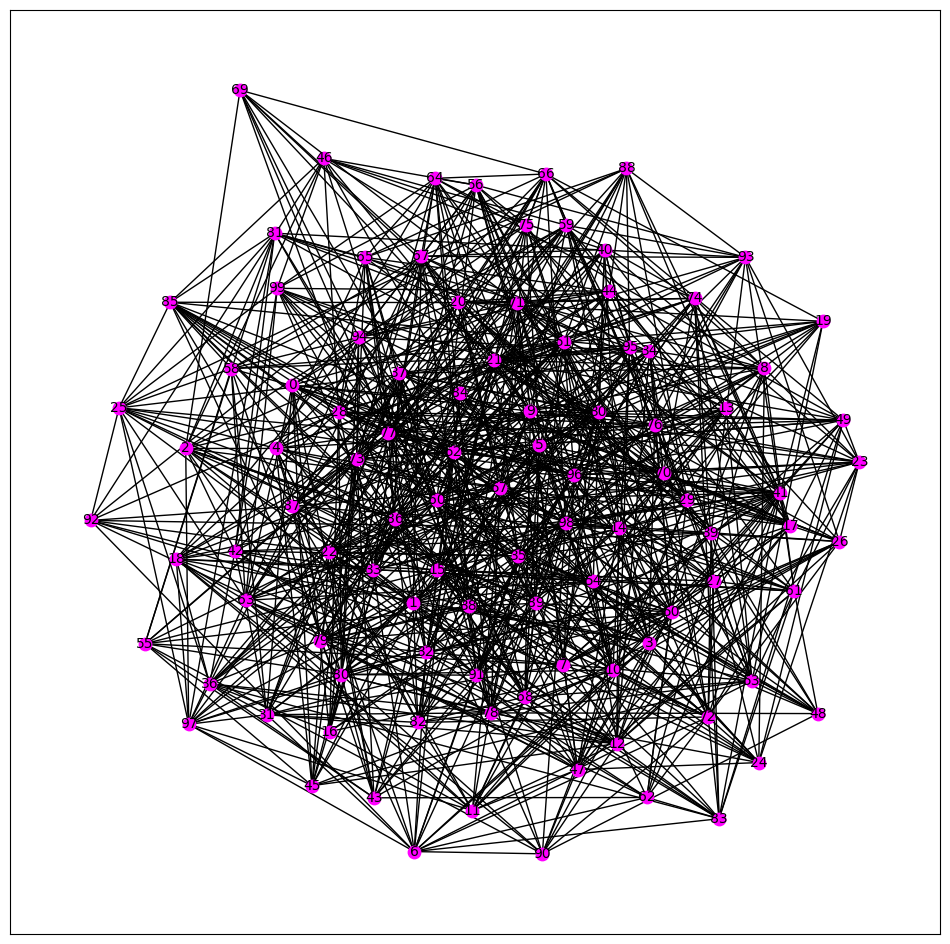

In [8]:
visualize_graph(graph)

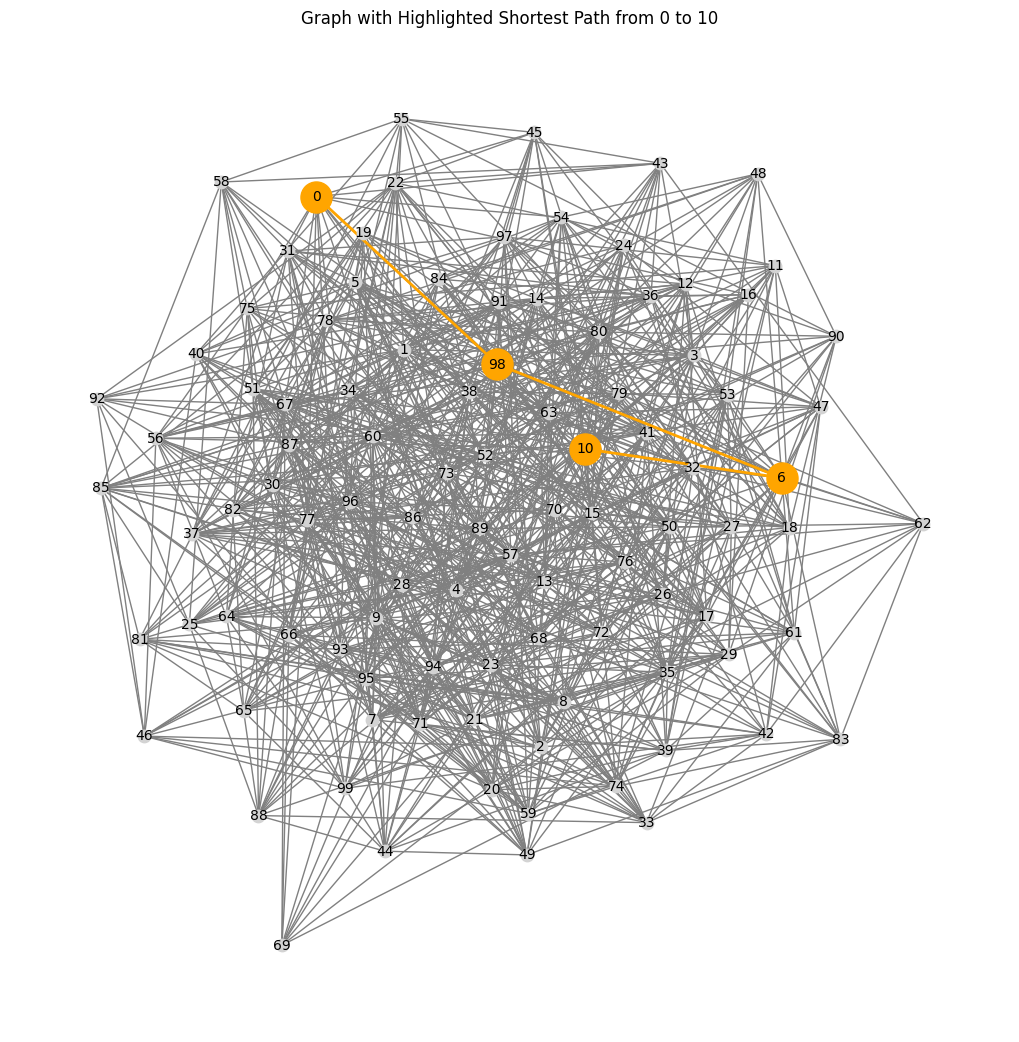

In [9]:
# change last two arguments from 0 to 99
visualize_graph_with_path(graph, distances, paths, 0, 10)

### Conclusion

Algorithms for dynamic programming and find the all pairs shortest paths are implemented. For dynamic programming was implemented fibonacci algorithms for all pair the shortest path Floyd_Warshall algorithm